# Custom_NIR_Expression_DB

In [1]:
from deepface import DeepFace
import os
from PIL import Image
import numpy as np
import cv2
import pandas as pd

2024-02-21 15:20:57.562795: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 15:21:00.852435: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 15:21:00.857173: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 15:21:10.312519: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Protocol

***

All subjects were instructed to do following expressions:

* neutral
* happiness
* sadness
* surprise
* fear
* anger
* disgust
* contempt
* 2 random expressions except those above (such as tiredness, envy, calmness, love, boredom, etc.)

For each expression were acquired multiple images and from those was chosen one image from each expression and for disgust and contempt were extracted 2 images (due to lack of those categories in other databases). For all subject were overall chosen 12 images. Expressions were acquired from 15<strong style="color: red;">TODO</strong> subjects which makes 180 images, however some images had insufficient expression so total number is <strong style="color: red;">TODO</strong>. All subjects were Caucasian race in age range of 21-60 and their gender was 8 women, 7 men <strong style="color: red;">TODO</strong>.

Images were acquired from NIR camera [TP-LINK Tapo C500](https://www.tp-link.com/en/home-networking/cloud-camera/tapo-c500/) with 1080p resolution, however a few images were in lower resolution.

Images were subsequently processed by *RetinaFace* face detector (including detection and face alignment) mediated by [deepface framework](https://github.com/serengil/deepface) to 224x224 images. Then annotated categorically and spatially (Circumplex Model of Affect) using [annotator](https://gitlab.fit.cvut.cz/vadlemar/real-time-facial-expression-recognition-in-the-wild/-/blob/master/src/Custom_Test_Set_160/annotator_gui_EN.py?ref_type=heads) from original work.

***

## Processing

Process images - detect faces

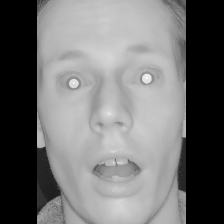

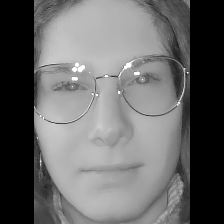

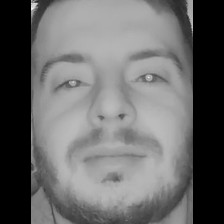

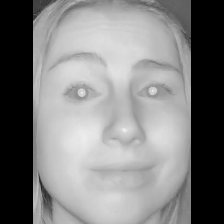

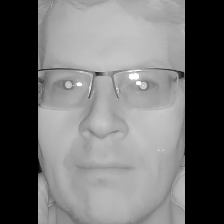

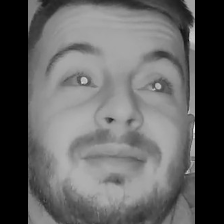

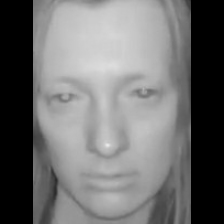

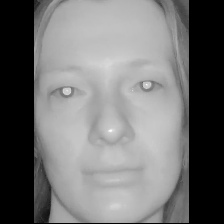

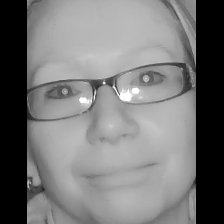

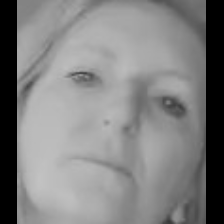

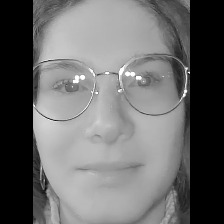

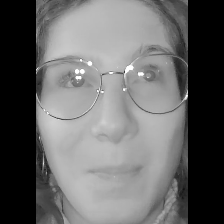

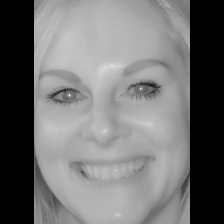

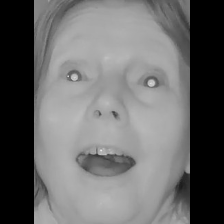

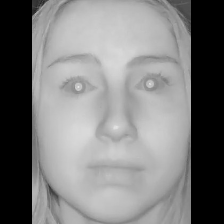

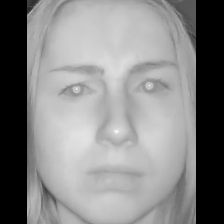

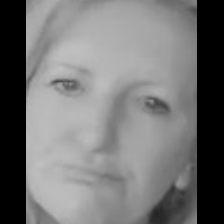

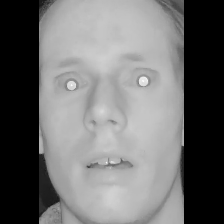

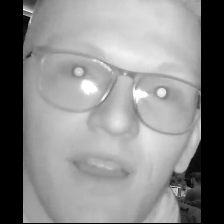

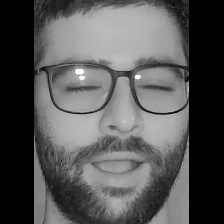

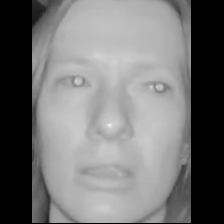

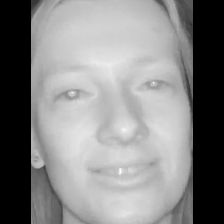

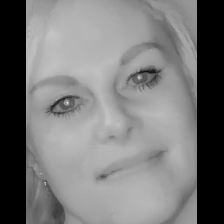

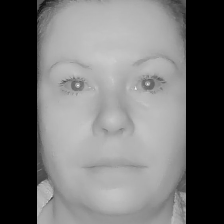

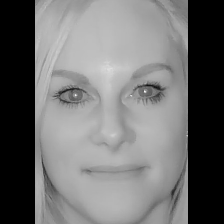

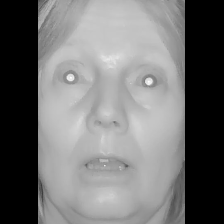

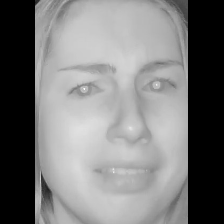

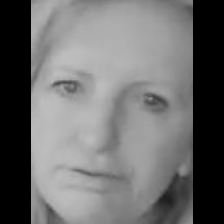

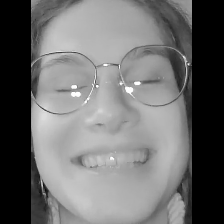

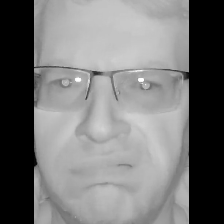

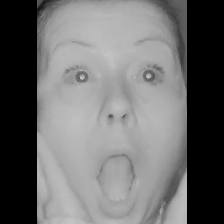

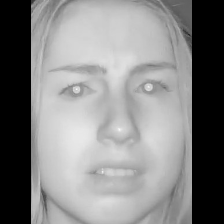

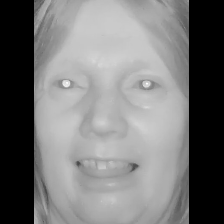

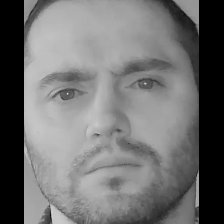

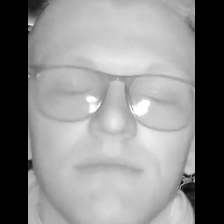

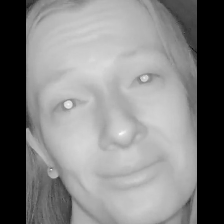

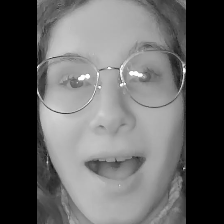

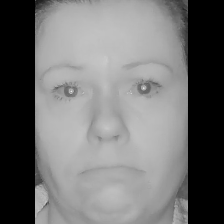

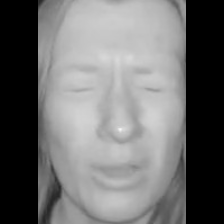

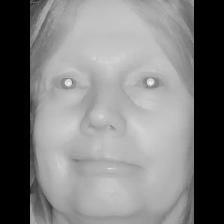

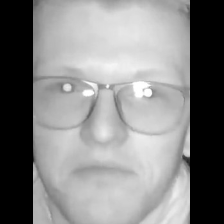

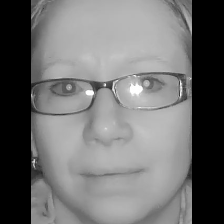

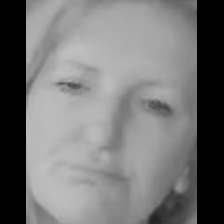

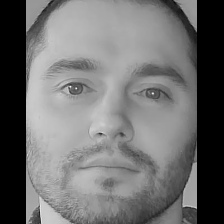

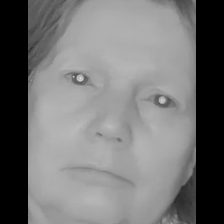

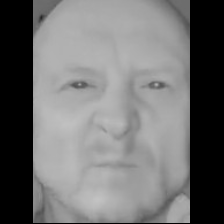

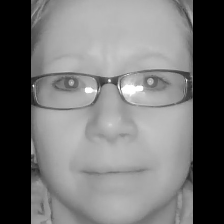

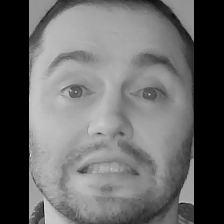

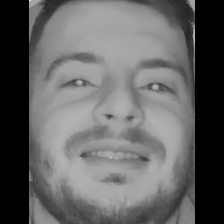

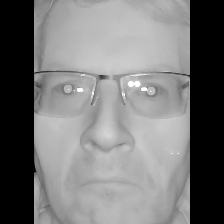

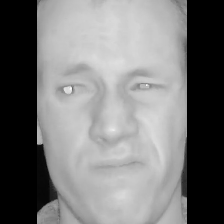

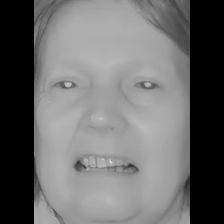

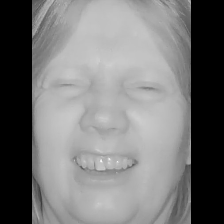

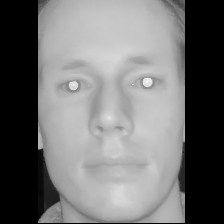

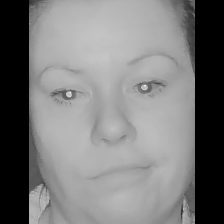

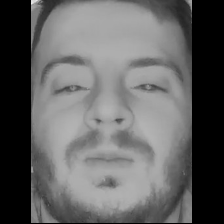

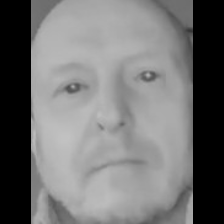

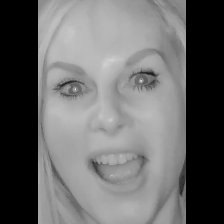

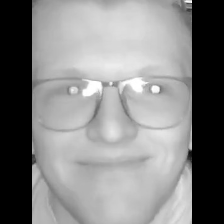

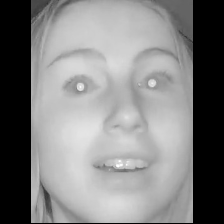

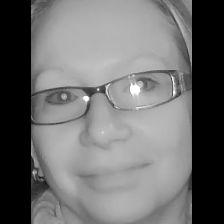

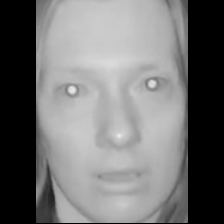

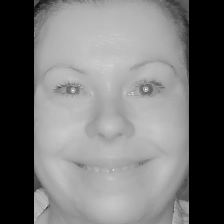

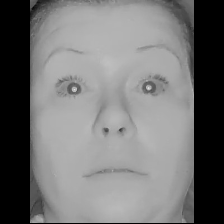

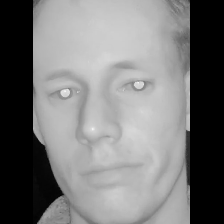

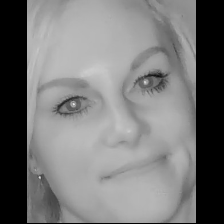

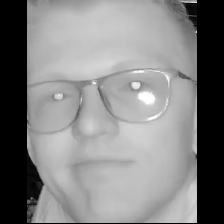

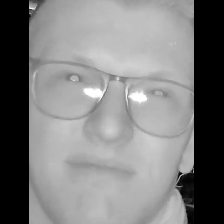

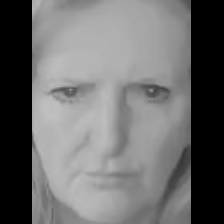

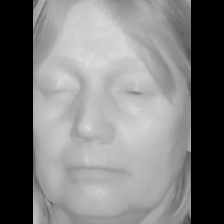

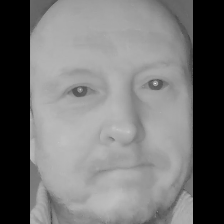

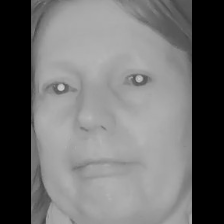

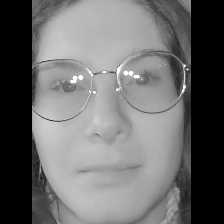

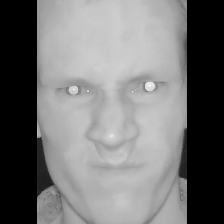

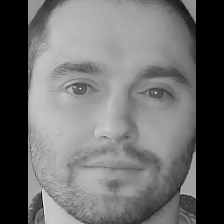

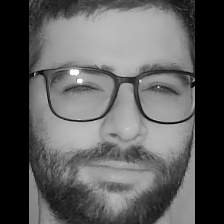

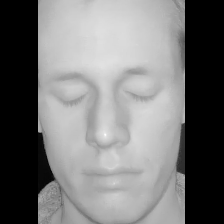

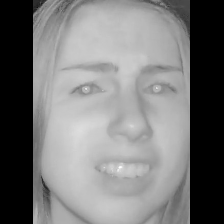

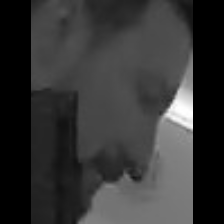

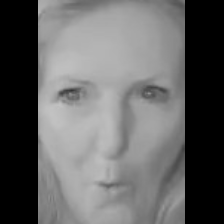

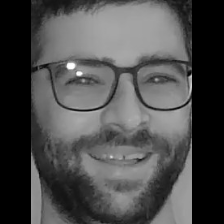

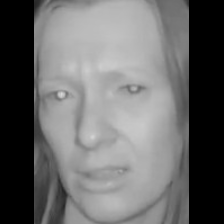

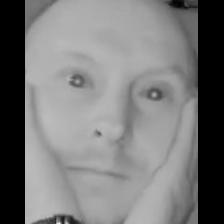

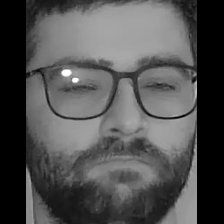

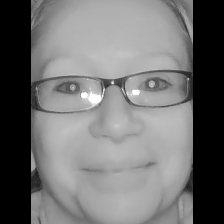

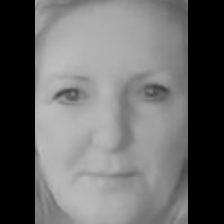

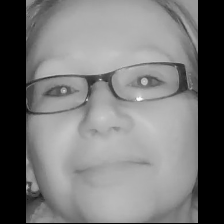

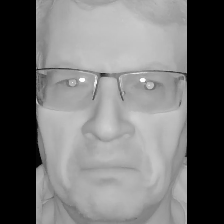

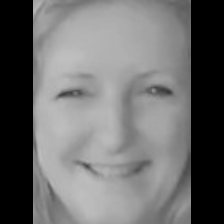

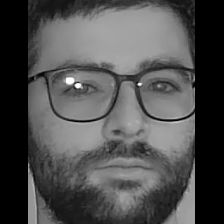

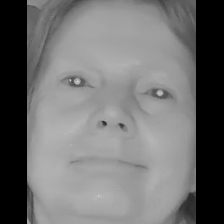

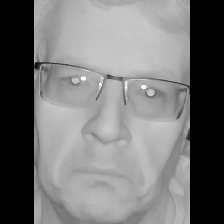

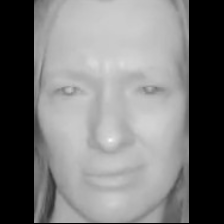

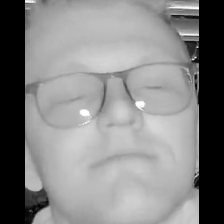

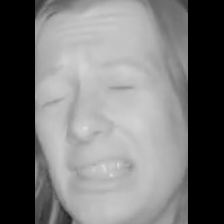

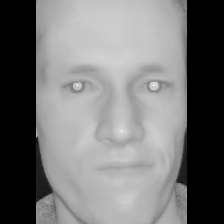

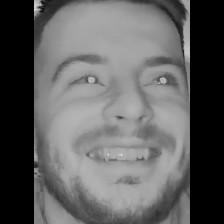

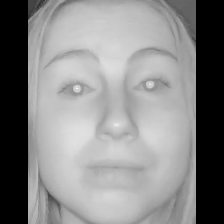

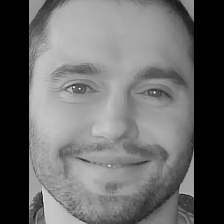

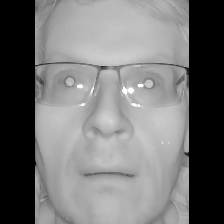

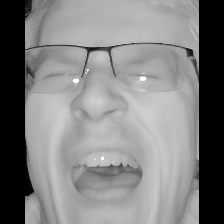

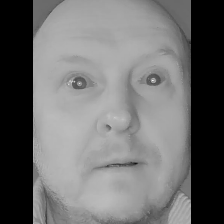

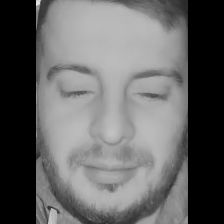

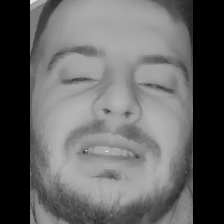

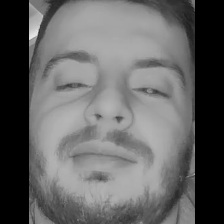

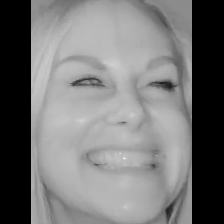

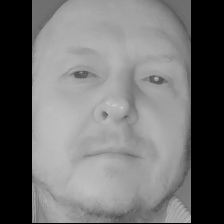

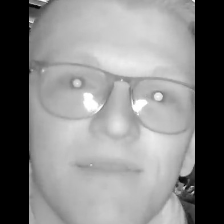

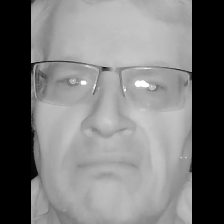

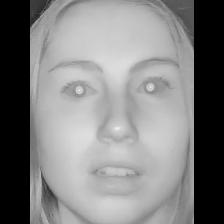

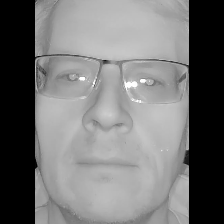

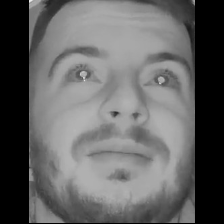

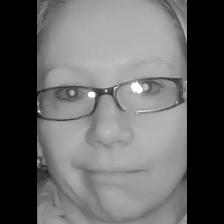

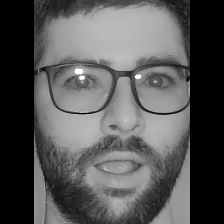

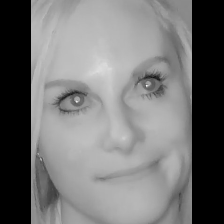

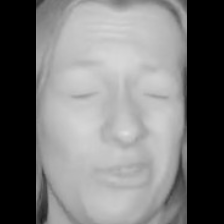

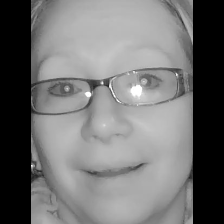

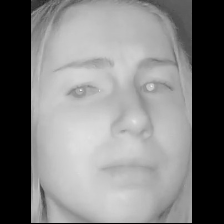

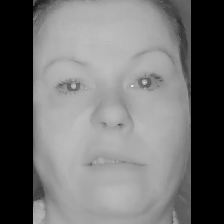

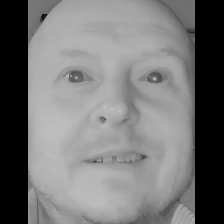

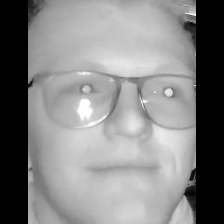

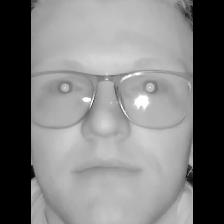

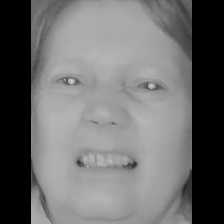

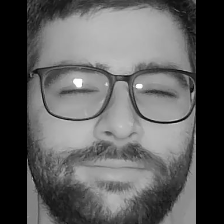

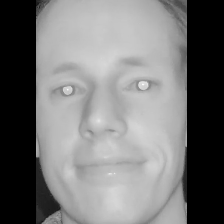

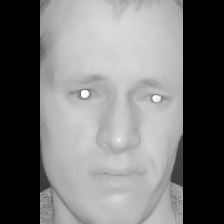

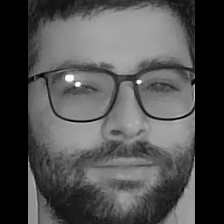

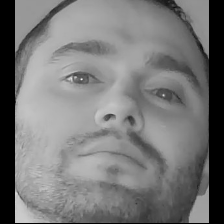

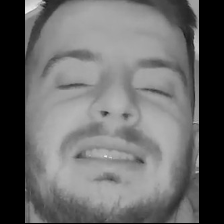

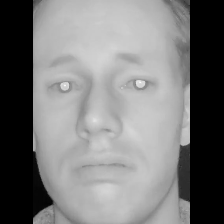

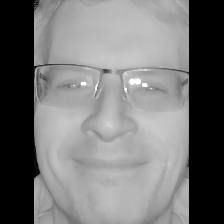

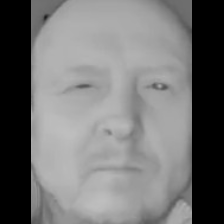

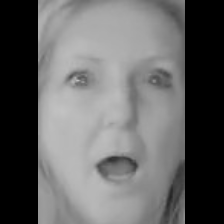

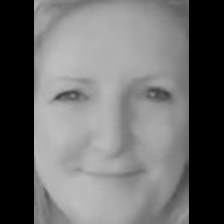

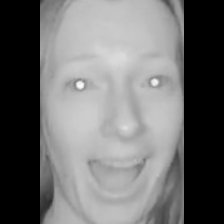

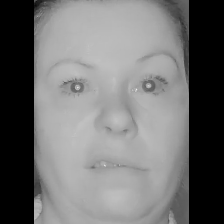

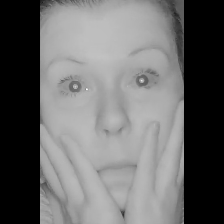

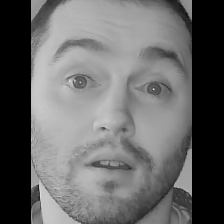

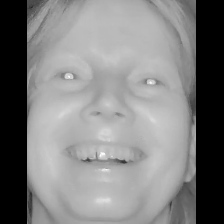

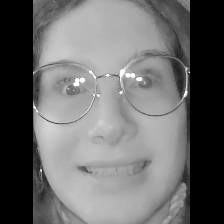

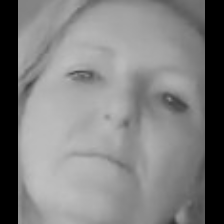

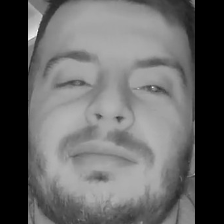

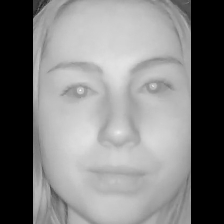

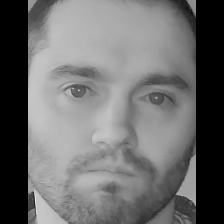

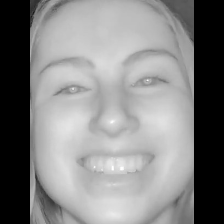

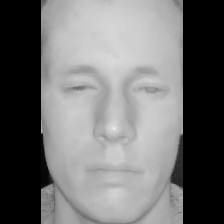

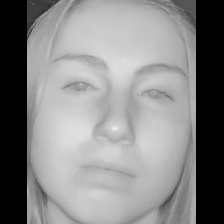

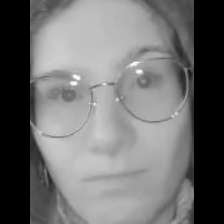

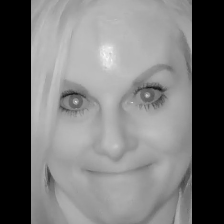

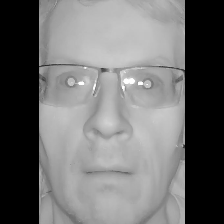

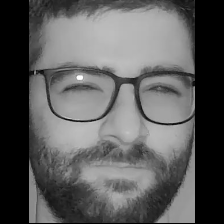

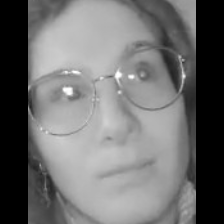

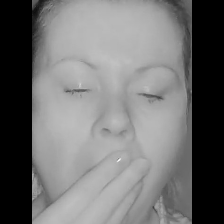

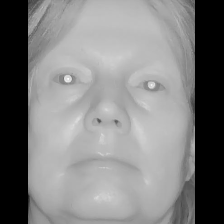

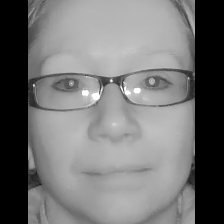

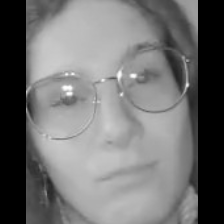

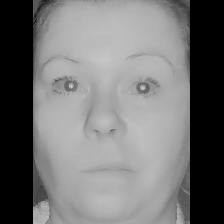

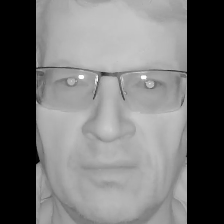

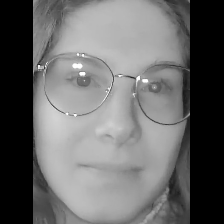

In [2]:
pth = "./_other/custom_all_filtered/"
trgt_pth = 'custom_nir_unaligned'

fn = os.listdir(pth)
os.makedirs(trgt_pth, exist_ok=True)

for f in fn:
    face_obj = DeepFace.extract_faces(
        str(os.path.join(pth, f)),
        detector_backend="retinaface",
        align=False
    )
    face = (face_obj[0]['face'] * 255).astype(np.uint8)
    display(Image.fromarray(face))

    trgt_fp = str(os.path.join(trgt_pth, f))

    cv2.imwrite(trgt_fp, face)

## Explore Annotations

Explore Categorical expressions

In [37]:
annotations = pd.read_csv('custom_nir-annotations.csv')

# If incorporate into exploration also annotated affected images from BUAA Database
# annotations_buaa = pd.read_csv('buaa_w_neutral-annotations.csv')
# annotations = pd.concat([annotations_buaa, annotations])

expr_dict = {
    0: "NEUTRAL",
    1: "HAPPY",
    2: "ANGRY",
    3: "SAD",
    4: "AFRAID",
    5: "SURPRISE",
    6: "DISGUST",
    7: "CONTEMPT"
}
annotations = annotations.drop(columns=['Unnamed: 0'])
annotations['expression'] = annotations['expression'].apply(
    lambda x: expr_dict[int(x)])

Display distribution

filename gender   race adult expression  valence  arousal
0  1-0-neutral.jpg   male  cauca   yes    NEUTRAL     0.06    -0.08

valence     arousal
count  159.000000  159.000000
mean    -0.099119    0.389119
std      0.479300    0.456444
min     -0.840000   -0.970000
25%     -0.555000    0.065000
50%     -0.110000    0.550000
75%      0.235000    0.765000
max      0.920000    0.920000

<Axes: >

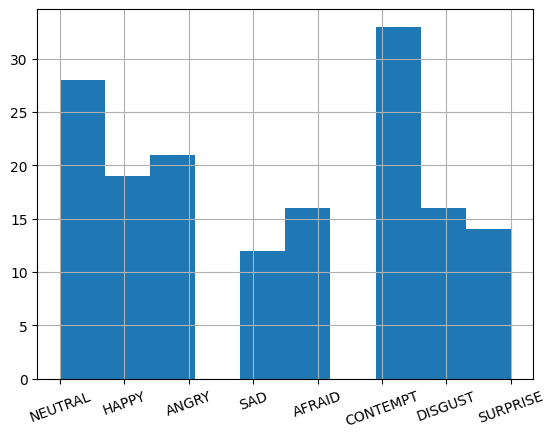

In [38]:
display(annotations.head(1))
display(annotations.describe())
display(annotations.expression.hist(xrot=20))

Explore Spatial expressions - valence arousal

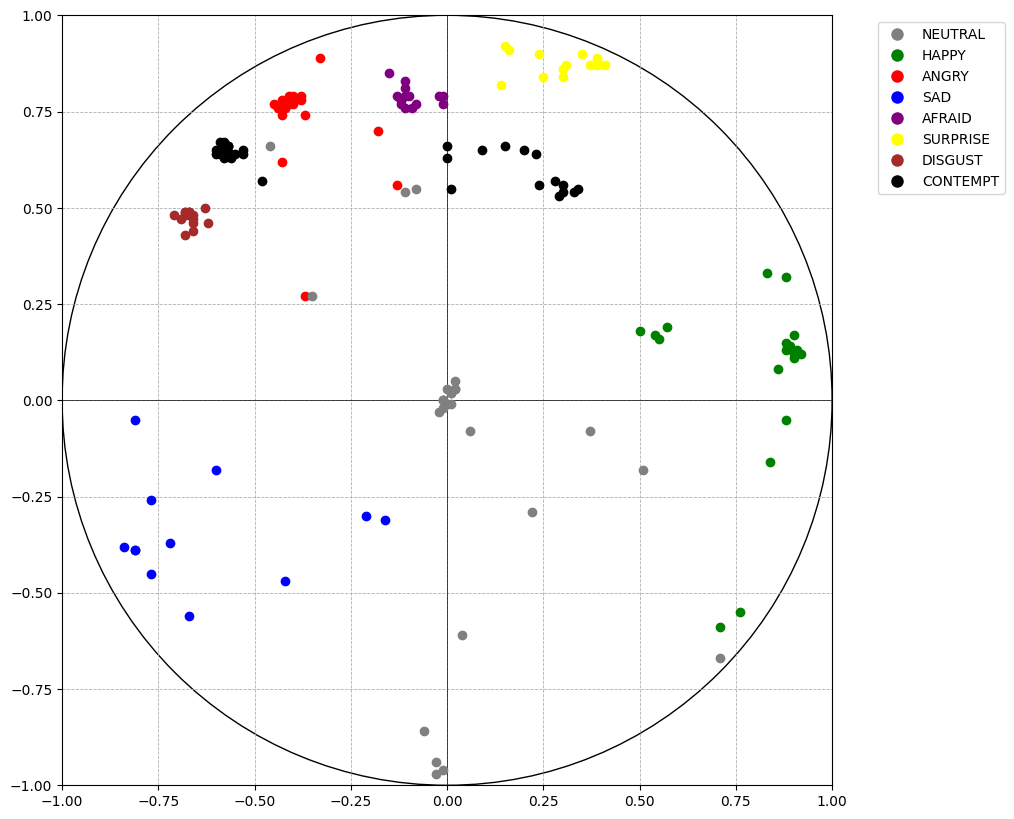

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure with a larger size and set the limits of the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Draw a circle with center at (0,0) and radius 1
circle = plt.Circle((0, 0), 1, fill=False)
ax.add_artist(circle)

# Draw the axes
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.6)

# Define the colors for each emotion
emotion_colors = {
    "NEUTRAL": 'gray',    # NEUTRAL
    "HAPPY": 'green',   # HAPPY
    "ANGRY": 'red',     # ANGRY
    "SAD": 'blue',    # SAD
    "AFRAID": 'purple',  # AFRAID
    "SURPRISE": 'yellow',  # SURPRISE
    "DISGUST": 'brown',   # DISGUST
    "CONTEMPT": 'black'    # CONTEMPT
}

# Function to plot points with different colors based on emotion
def plot_points(points, emotions):
    for point, emotion in zip(points, emotions):
        ax.plot(point[0], point[1], marker='o', color=emotion_colors[emotion])

# Example usage of plot_points function
plot_points(zip(annotations.valence, annotations.arousal), annotations.expression)

# Create a legend for the emotions
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in emotion_colors.values()]
ax.legend(legend_elements, ['NEUTRAL', 'HAPPY', 'ANGRY', 'SAD', 'AFRAID', 'SURPRISE', 'DISGUST', 'CONTEMPT'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure as a PNG file
plt.savefig("custom_nir-valence_arousal_labels.png", bbox_inches='tight')


Display it with Valence Arousal model

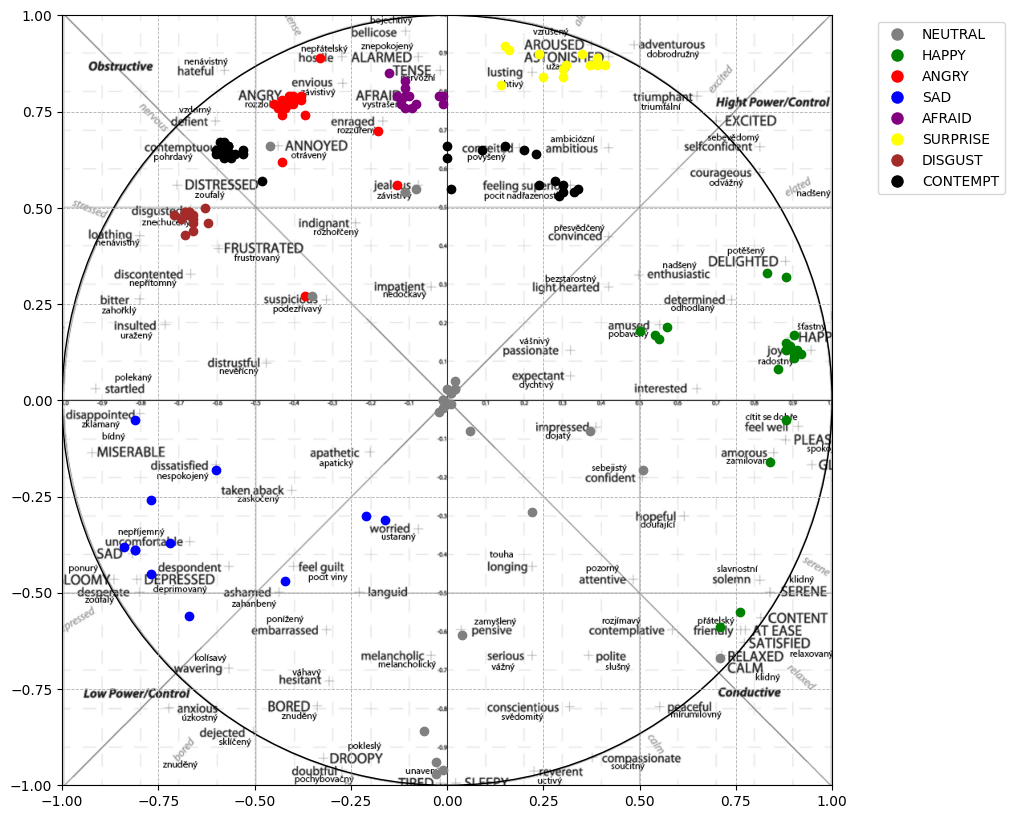

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# Create a new figure with a larger size and set the limits of the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Load the image
img = mpimg.imread('VAmodel.png')

# Display the image
ax.imshow(img, extent=[-1.19, 1.17, -1.11, 1.1])

# Draw a circle with center at (0,0) and radius 1
circle = plt.Circle((0, 0), 1, fill=False)
ax.add_artist(circle)

# Draw the axes
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
plt.grid(linestyle='--', linewidth=0.6)

# Define the colors for each emotion
emotion_colors = {
    "NEUTRAL": 'gray',    # NEUTRAL
    "HAPPY": 'green',   # HAPPY
    "ANGRY": 'red',     # ANGRY
    "SAD": 'blue',    # SAD
    "AFRAID": 'purple',  # AFRAID
    "SURPRISE": 'yellow',  # SURPRISE
    "DISGUST": 'brown',   # DISGUST
    "CONTEMPT": 'black'    # CONTEMPT
}

# Function to plot points with different colors based on emotion
def plot_points(points, emotions):
    for point, emotion in zip(points, emotions):
        ax.plot(point[0], point[1], marker='o', color=emotion_colors[emotion])

# Usage of plot_points function
plot_points(zip(annotations.valence, annotations.arousal), annotations.expression)

# Create a legend for the emotions
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in emotion_colors.values()]
ax.legend(legend_elements, ['NEUTRAL', 'HAPPY', 'ANGRY', 'SAD', 'AFRAID', 'SURPRISE', 'DISGUST', 'CONTEMPT'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the figure as a PNG file
plt.savefig("custom_nir-valence_arousal_labels_w_VAcirc.png", bbox_inches='tight')
